In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = 500

## Предсказание отклика банковских клиентов на основе данных маркетинговой компании банков

### Loading data

In [2]:
df = pd.read_csv('banking.csv')

### Basic info about data

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [ ]:
df['campaign'].value_counts()

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df.describe()

### First steps


Missing data

In [4]:
df.isna().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


### Numerical data

List

Pearson correlation: basic and using seaborn

Removing highly correlated features

VarianceThreshold - quasiconstant features

Boxplot of couple numerical columns (`sns.boxplot(y=c, x=df['y'].astype('category'), data=df`))

In [ ]:
numerical = df.describe().columns
sns.heatmap(df[numerical].corr(), annot=True, fmt='.2f')

In [5]:
df = df.drop(['nr_employed','euribor3m'],axis=1)
numerical = df.describe().columns

In [ ]:
numerical

In [ ]:
df[numerical].describe()

### Categorical data

Catplot `sns.catplot(x=col, kind='count', col='y', data=df, sharey=False); set_xticklabels(rotation=60)`

Removing invariable features

Encoding remaining features (one-hot encoding / mean-target encoding)

In [ ]:
categorical = df.describe(include='object').columns

In [ ]:
plt.figure(figsize=(6,10))
for col in categorical:
  g = sns.catplot(x=col, kind='count', col='y', data=df, sharey=False)
  g.set_xticklabels(rotation=60)

In [6]:
df = df.drop(['housing','loan','day_of_week'],axis=1)
categorical = df.describe(include='object').columns

In [ ]:
df.head()

In [ ]:
df.describe(include='object')

In [7]:
for col in (['marital','default','contact','poutcome']):
  temp = pd.get_dummies(df[col], dtype=int, drop_first=True)
  df = pd.concat((df, temp), axis=1)

In [ ]:
df.head()

In [ ]:
df.groupby('job')['y'].mean()

In [8]:
for col in (['job','education','month']):
  means = df.groupby(col)['y'].mean()
  df[col] = df[col].map(means)

In [9]:
df = df.drop(['marital','default','contact','poutcome'],axis=1)

In [10]:
df.head()

,age,job,education,month,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,y,married,single,unknown,unknown,yes,telephone,nonexistent,success
0,44,0.068943,0.102490,0.106021,210,1,999,0,1.4,93.444,-36.1,0,1,0,0,1,0,0,1,0
1,53,0.108260,0.145003,0.101439,138,1,999,0,-0.1,93.200,-42.0,0,1,0,0,0,0,0,1,0
2,28,0.112175,0.137245,0.105115,339,3,6,2,-1.7,94.055,-39.8,1,0,1,0,0,0,0,0,1
3,39,0.081381,0.108355,0.204787,185,2,999,0,-1.8,93.075,-47.1,0,1,0,0,0,0,0,1,0
4,55,0.252326,0.102490,0.106021,137,1,3,1,-2.9,92.201,-31.4,1,1,0,0,0,0,0,0,1


### Logistic regression

Classes_, predict_proba, decision_function_

Score on pipeline (pipe.score)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline


In [29]:
X = df.drop('y', axis=1)
Y = df['y']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, random_state=25)
pipe = Pipeline(
    [
        ('Scaler',StandardScaler()),
        ('Log',LogisticRegression(class_weight='balanced')) ### class_weight='balanced'
    ]
)
pipe.fit(X_train,Y_train)

Pipeline(steps=[('Scaler', StandardScaler()),
                ('Log', LogisticRegression(class_weight='balanced'))])

In [ ]:
predict = pipe.predict(X_test)

In [30]:
pipe.score(X_test, Y_test)

0.8645236476643683

In [ ]:
pipe.classes_

In [ ]:
Y_test.head()

In [ ]:
predict[0:5]

In [ ]:
pipe.predict_proba(X_test[0:5])

In [ ]:
pipe.decision_function(X_test[100:125:])

### How good we are

Classes imbalance

In [ ]:
np.mean(df['y']==0)

In [ ]:
df['y'].value_counts()[0] / (df['y'].value_counts()[0] + df['y'].value_counts()[1])

In [ ]:
df['y'].value_counts()

### Confusion matrix

In [16]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(Y_test, pipe.predict(X_test)).ravel()

print(f'True Negative: {tn}')
print(f'False Positive: {fp}')
print(f'False Negative: {fn}')
print(f'True Positive: {tp}')

True Negative: 7762
False Positive: 1354
False Negative: 122
True Positive: 1059


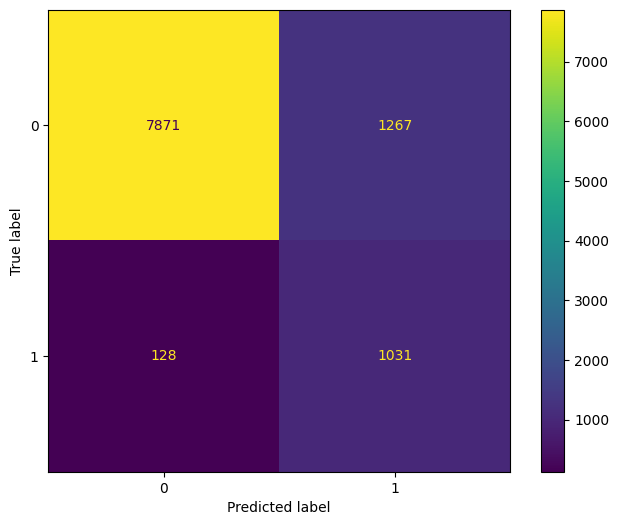

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, pipe.predict(X_test), labels=pipe.classes_)
cmp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(8,6))
cmp.plot(ax=ax)
plt.show()

In [32]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

print(f'Accuracy равно: {accuracy_score(Y_test, pipe.predict(X_test)):.3f}' )
print(f'Precision равно: {precision_score(Y_test, pipe.predict(X_test)):.3f}' )
print(f'Recall равно: {recall_score(Y_test, pipe.predict(X_test)):.3f}' )
print(f'F-мера равно: {f1_score(Y_test, pipe.predict(X_test)):.3f}' )

Accuracy равно: 0.865
Precision равно: 0.449
Recall равно: 0.890
F-мера равно: 0.596


### ROC/PR и AUC кривые

In [ ]:
### Получим всевозможные пары FPR, TPR
### И нарисуем ROC-кривую
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, pipe.predict_proba(X_test)[:, 1])
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [21]:
### Посчитаем ROC-AUC
from sklearn.metrics import auc
auc(fpr, tpr)

NameError: name 'fpr' is not defined

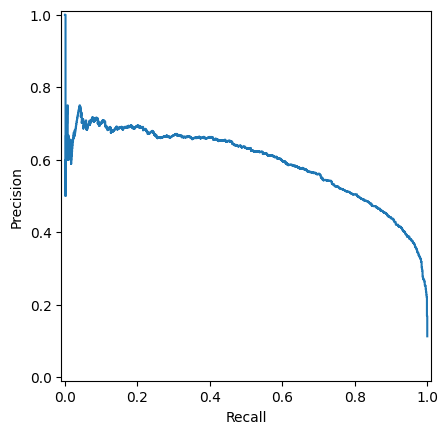

In [33]:
### Получим всевозможные пары Precision, Recall
### И нарисуем PR-кривую
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(Y_test, pipe.predict_proba(X_test)[:, 1])
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay(precision=precision, recall=recall).plot()

In [34]:
### Посчитаем PR-AUC
auc(recall, precision)

0.5932848161460286

In [ ]:
precision_recall_curve(Y_test, pipe.predict_proba(X_test)[:, 1])

In [ ]:
precision

In [ ]:
recall

In [ ]:
thresholds

### Изменение порога отсечения для максимизации F-меры

In [ ]:
### Найдем threshold, максимизирующий F-меру

from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(Y_test, pipe.predict_proba(X_test)[:, 1])
f_scores = 2 * precision * recall / (precision + recall)
f_scores = np.where(np.isnan(f_scores), 0 , f_scores)
print("Best F-score: ", np.max(f_scores))
print("Threshold for Best F-score: ", thresholds[np.argmax(f_scores)])
print("Best precision: ", np.max(precision))
print("Threshold for Best precision: ", thresholds[np.argmax(precision)-1])
print("Best recall: ", np.max(recall))
print("Threshold for Best recall: ", thresholds[np.argmax(recall)])

In [ ]:
from sklearn.metrics import precision_recall_curve
precision_recall_curve(Y_test, pipe.predict_proba(X_test)[:, 1])

In [ ]:
### Вычислим precision при этом threshold'е
precision[np.argmax(f_scores)]

In [ ]:
### Вычислим recall при этом threshold'е
recall[np.argmax(f_scores)]

In [ ]:
f_scores = 2 * precision[np.argmax(f_scores)] * recall[np.argmax(f_scores)] / (precision[np.argmax(f_scores)] + recall[np.argmax(f_scores)])

In [ ]:
f_scores

In [ ]:
from scipy.integrate import quad

In [ ]:
def func(x):
  return x ** 2

In [ ]:
quad(func, -2, 5)

### KNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [78]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, random_state=25)
pipe = Pipeline(
    [
        ('Scaler',StandardScaler()),
        ('KNN',KNeighborsClassifier(n_neighbors=7, weights='uniform', algorithm ='kd_tree'))
    ]
)
pipe.fit(X_train,Y_train)

Pipeline(steps=[('Scaler', StandardScaler()),
                ('KNN',
                 KNeighborsClassifier(algorithm='kd_tree', n_neighbors=7))])

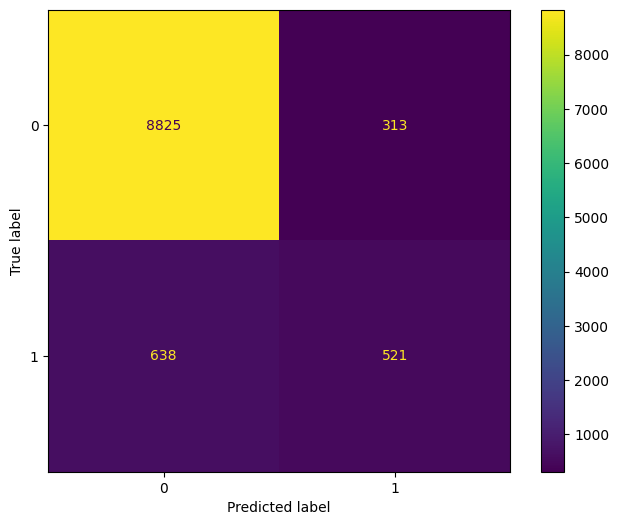

In [79]:
cm = confusion_matrix(Y_test, pipe.predict(X_test), labels=pipe.classes_)
cmp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(8,6))
cmp.plot(ax=ax)
plt.show()

In [80]:
print(f'Accuracy равно: {accuracy_score(Y_test, pipe.predict(X_test)):.3f}' )
print(f'Precision равно: {precision_score(Y_test, pipe.predict(X_test)):.3f}' )
print(f'Recall равно: {recall_score(Y_test, pipe.predict(X_test)):.3f}' )
print(f'F-мера равно: {f1_score(Y_test, pipe.predict(X_test)):.3f}' )

Accuracy равно: 0.908
Precision равно: 0.625
Recall равно: 0.450
F-мера равно: 0.523


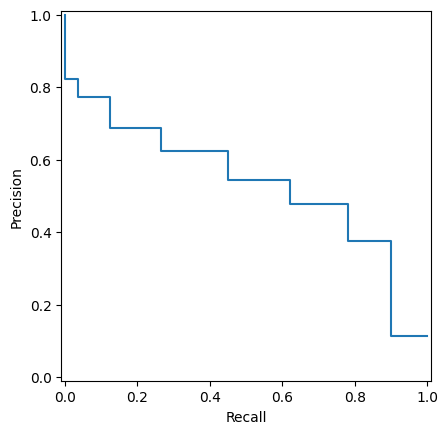

In [81]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(Y_test, pipe.predict_proba(X_test)[:, 1])
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay(precision=precision, recall=recall).plot()

In [82]:
auc(precision, recall)

0.4719638253520994

In [95]:
X

,age,job,education,month,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,married,single,unknown,unknown,yes,telephone,nonexistent,success
0,44,0.068943,0.102490,0.106021,210,1,999,0,1.4,93.444,-36.1,1,0,0,1,0,0,1,0
1,53,0.108260,0.145003,0.101439,138,1,999,0,-0.1,93.200,-42.0,1,0,0,0,0,0,1,0
2,28,0.112175,0.137245,0.105115,339,3,6,2,-1.7,94.055,-39.8,0,1,0,0,0,0,0,1
3,39,0.081381,0.108355,0.204787,185,2,999,0,-1.8,93.075,-47.1,1,0,0,0,0,0,1,0
4,55,0.252326,0.102490,0.106021,137,1,3,1,-2.9,92.201,-31.4,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,0.252326,0.108355,0.105115,222,1,999,0,1.4,94.465,-41.8,1,0,0,1,0,1,1,0
41184,31,0.100000,0.102490,0.064347,196,2,999,0,1.1,93.994,-36.4,1,0,0,1,0,1,1,0
41185,42,0.129726,0.137245,0.064347,62,3,999,0,1.1,93.994,-36.4,0,1,0,1,0,1,1,0
41186,48,0.108260,0.113485,0.438719,200,2,999,0,-3.4,92.431,-26.9,1,0,0,0,0,1,1,0


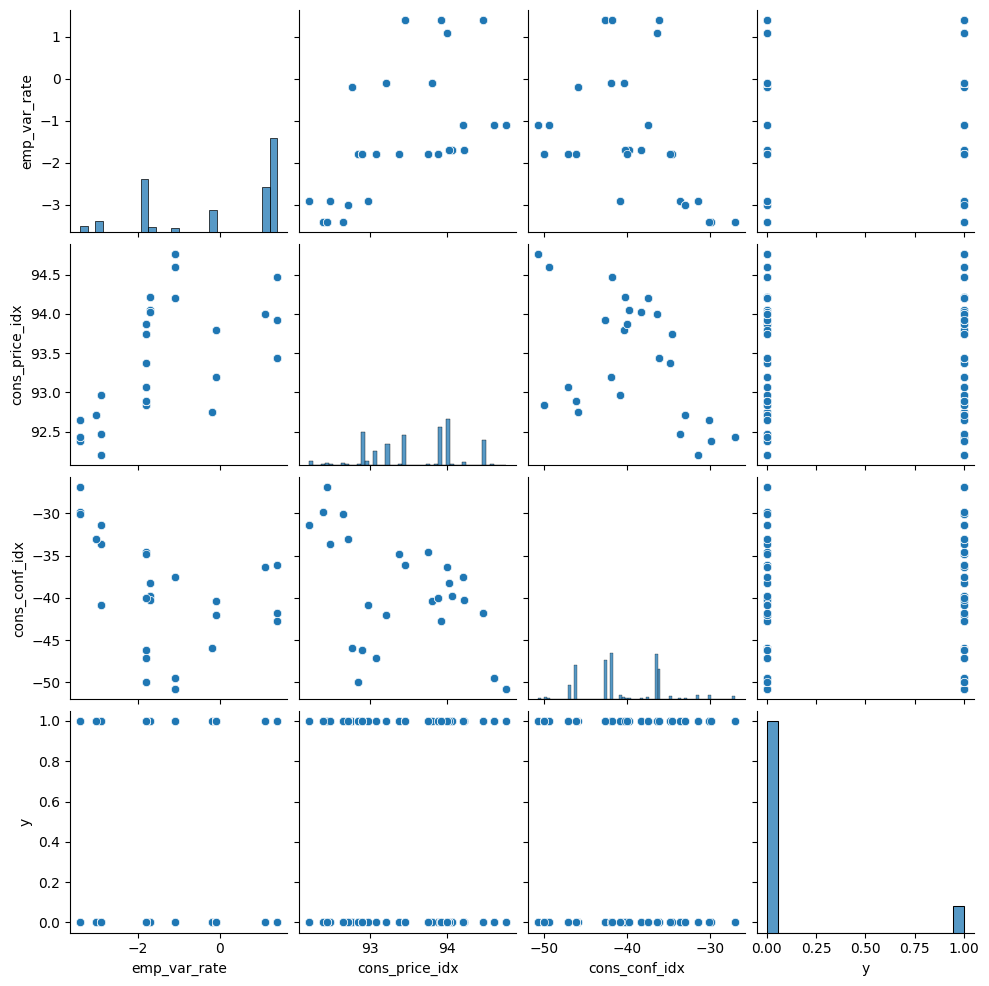

In [96]:
sns.pairplot(pd.concat((X[['emp_var_rate','cons_price_idx','cons_conf_idx']],Y), axis=1))

### SVM

In [97]:
from sklearn.svm import LinearSVC

In [98]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, random_state=25)
pipe = Pipeline(
    [
        ('Scaler',StandardScaler()),
        ('SVM',LinearSVC())
    ]
)
pipe.fit(X_train,Y_train)

Pipeline(steps=[('Scaler', StandardScaler()), ('SVM', LinearSVC())])

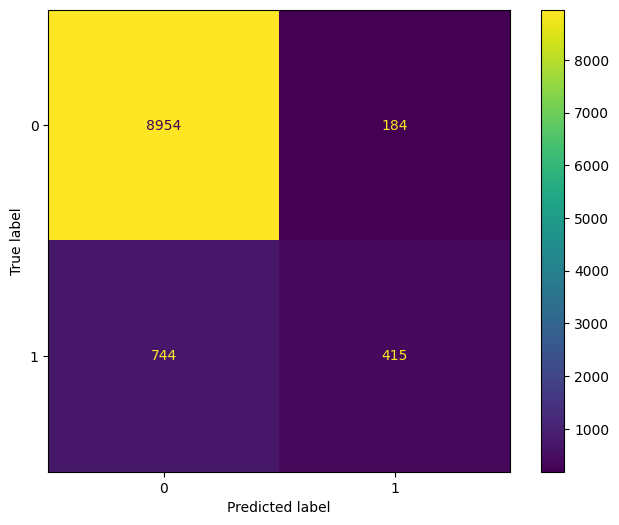

In [99]:
cm = confusion_matrix(Y_test, pipe.predict(X_test), labels=pipe.classes_)
cmp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(8,6))
cmp.plot(ax=ax)
plt.show()

In [100]:
print(f'Accuracy равно: {accuracy_score(Y_test, pipe.predict(X_test)):.3f}' )
print(f'Precision равно: {precision_score(Y_test, pipe.predict(X_test)):.3f}' )
print(f'Recall равно: {recall_score(Y_test, pipe.predict(X_test)):.3f}' )
print(f'F-мера равно: {f1_score(Y_test, pipe.predict(X_test)):.3f}' )

Accuracy равно: 0.910
Precision равно: 0.693
Recall равно: 0.358
F-мера равно: 0.472


In [108]:
def sigmoid(x):
  return(1 / (1 + np.exp(x)))

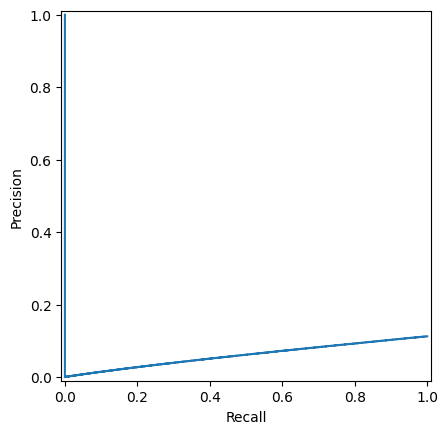

In [110]:
from sklearn.metrics import precision_recall_curvedecision_function(X_test))
precision, recall, thresholds = precision_recall_curve(Y_test, sigmoid(pipe.)
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay(precision=precision, recall=recall).plot()

In [112]:
recall

array([1.        , 0.99913719, 0.99827437, ..., 0.        , 0.        ,
       0.        ])

In [106]:
def sigmoid(x):
  return(1 / (1 + np.exp(x)))

In [114]:
from sklearn.svm import SVC

In [115]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, random_state=25)
pipe = Pipeline(
    [
        ('Scaler',StandardScaler()),
        ('SVM',SVC())
    ]
)
pipe.fit(X_train,Y_train)

Pipeline(steps=[('Scaler', StandardScaler()), ('SVM', SVC())])

In [119]:
scaler = StandardScaler()

In [120]:
scaled_X = scaler.fit_transform(X)

In [121]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, random_state=25)

In [130]:
model = SVC(probability=True, kernel='sigmoid')
model.fit(X_train, Y_train)

SVC(kernel='sigmoid', probability=True)

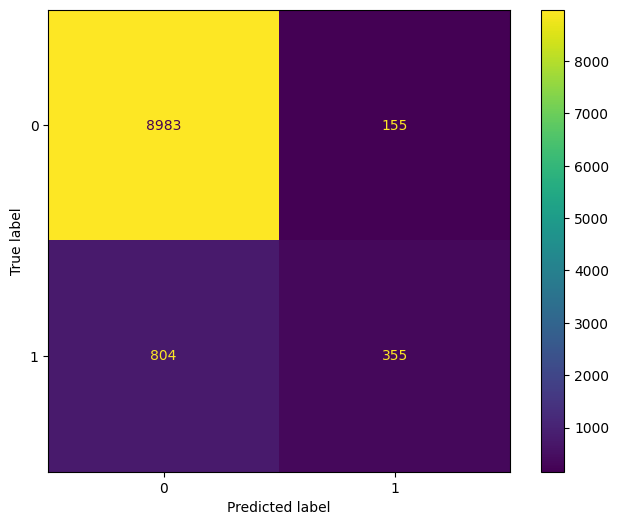

In [123]:
cm = confusion_matrix(Y_test, model.predict(X_test), labels=model.classes_)
cmp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(8,6))
cmp.plot(ax=ax)
plt.show()

In [131]:
print(f'Accuracy равно: {accuracy_score(Y_test, model.predict(X_test)):.3f}' )
print(f'Precision равно: {precision_score(Y_test, model.predict(X_test)):.3f}' )
print(f'Recall равно: {recall_score(Y_test, model.predict(X_test)):.3f}' )
print(f'F-мера равно: {f1_score(Y_test, model.predict(X_test)):.3f}' )

Accuracy равно: 0.902
Precision равно: 0.762
Recall равно: 0.191
F-мера равно: 0.305


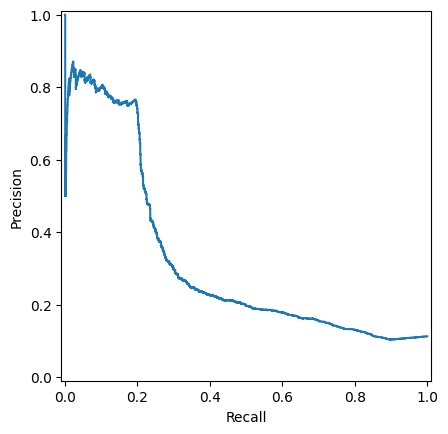

In [133]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(Y_test, model.predict_proba(X_test)[:, 1])
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay(precision=precision, recall=recall).plot()

In [134]:
auc(precision, recall)

ValueError: x is neither increasing nor decreasing : [0.11255706 0.11247086 0.11238465 ... 0.5        1.         1.        ].